In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,NuSVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [2]:
df = pd.read_csv("./total_data.csv")
df = df.drop(df.columns[0], axis=1)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   away_current_pos              1290 non-null   int64  
 1   away_last_yr_pos              1290 non-null   int64  
 2   away_prev_game_perf           1290 non-null   int64  
 3   away_team_av_points           1290 non-null   float64
 4   away_team_av_points_conceded  1290 non-null   float64
 5   away_team_away_form           1290 non-null   float64
 6   away_team_form                1290 non-null   float64
 7   away_team_rest_time           1290 non-null   int64  
 8   away_win_percentage           1290 non-null   float64
 9   h2h_form                      1290 non-null   float64
 10  home_current_pos              1290 non-null   int64  
 11  home_last_yr_pos              1290 non-null   int64  
 12  home_prev_game_perf           1290 non-null   int64  
 13  hom

In [4]:
df.describe()

,away_current_pos,away_last_yr_pos,away_prev_game_perf,away_team_av_points,away_team_av_points_conceded,away_team_away_form,away_team_form,away_team_rest_time,away_win_percentage,h2h_form,...,home_last_yr_pos,home_prev_game_perf,home_team_av_points,home_team_av_points_conceded,home_team_form,home_team_home_form,home_team_rest_time,home_win_percentage,match_importance,result
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,...,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,6.729457,6.435659,0.506977,22.129218,22.054279,-0.168075,0.050485,4.073643,51.155358,-0.004068,...,6.315504,0.489147,22.127549,22.046281,0.048201,0.321451,4.086822,52.756770,0.313178,0.549612
std,3.623321,3.509398,0.500145,1.480287,1.415301,1.099956,1.199006,17.609725,28.805234,0.817264,...,3.486936,0.500076,1.482633,1.422443,1.195566,1.151162,17.530208,28.331535,0.703243,0.497725
min,1.000000,1.000000,0.000000,17.294816,16.565196,-2.701142,-2.584464,-362.000000,0.000000,-2.559913,...,1.000000,0.000000,17.635853,16.585490,-2.667571,-2.471529,-362.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,0.000000,21.076196,21.168962,-1.030785,-0.821195,3.000000,30.000000,-0.460957,...,3.000000,0.000000,21.091174,21.164778,-0.832506,-0.516962,3.000000,33.333333,0.000000,0.000000
50%,7.000000,6.000000,1.000000,22.256022,22.109284,-0.201850,0.002430,5.000000,50.000000,0.000000,...,6.000000,0.000000,22.234245,22.071098,0.064800,0.331689,5.000000,50.000000,0.000000,1.000000
75%,10.000000,10.000000,1.000000,23.268152,23.095227,0.628908,0.997622,7.000000,75.000000,0.439817,...,9.750000,1.000000,23.297177,23.137101,0.936607,1.241081,7.000000,75.000000,0.000000,1.000000
max,15.000000,12.000000,1.000000,25.387892,25.142492,2.705412,2.758960,7.000000,100.000000,2.449891,...,12.000000,1.000000,25.786264,25.094782,2.845735,2.763209,7.000000,100.000000,3.000000,1.000000


In [5]:
df.sum()

away_current_pos                 8681.000000
away_last_yr_pos                 8302.000000
away_prev_game_perf               654.000000
away_team_av_points             28546.690631
away_team_av_points_conceded    28450.019568
away_team_away_form              -216.817074
away_team_form                     65.125136
away_team_rest_time              5255.000000
away_win_percentage             65990.411737
h2h_form                           -5.247557
home_current_pos                 8491.000000
home_last_yr_pos                 8147.000000
home_prev_game_perf               631.000000
home_team_av_points             28544.537572
home_team_av_points_conceded    28439.702130
home_team_form                     62.179396
home_team_home_form               414.671744
home_team_rest_time              5272.000000
home_win_percentage             68056.233592
match_importance                  404.000000
result                            709.000000
dtype: float64

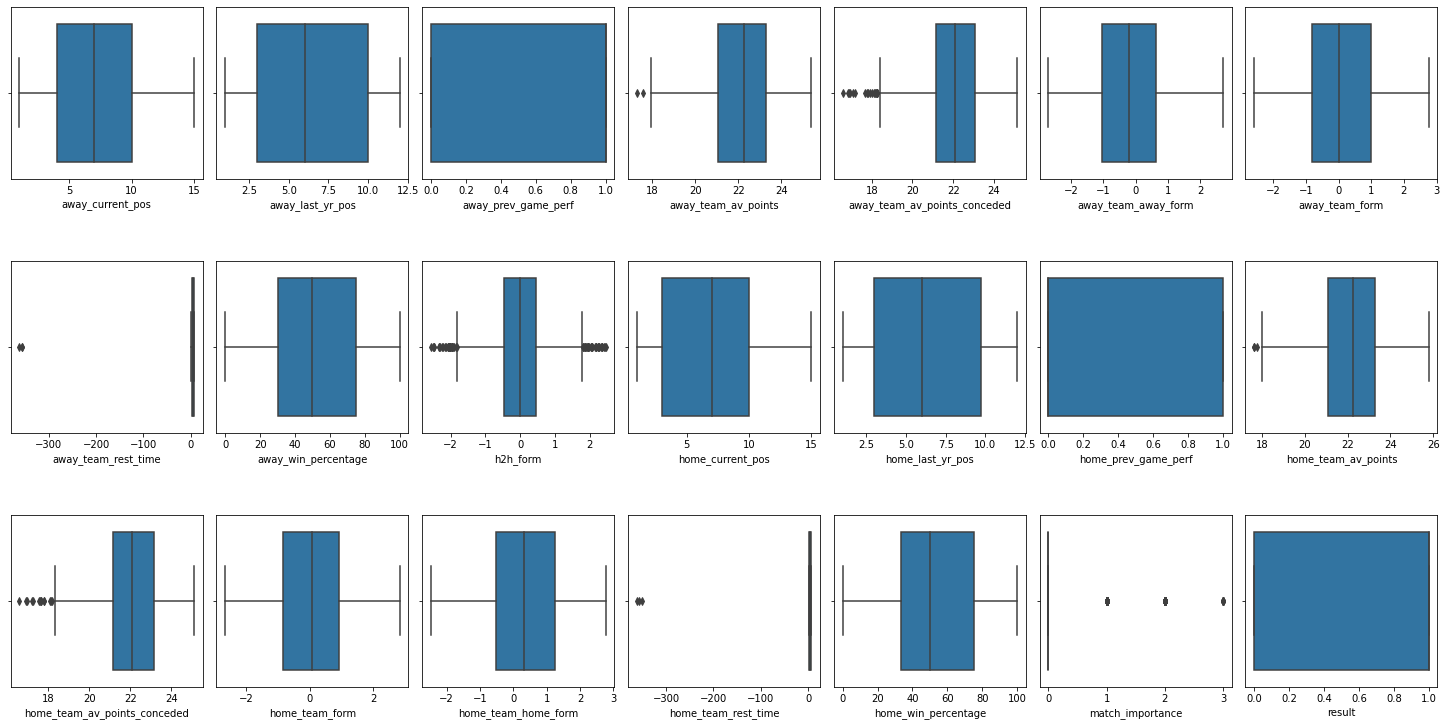

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(x=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

c:\users\hp\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

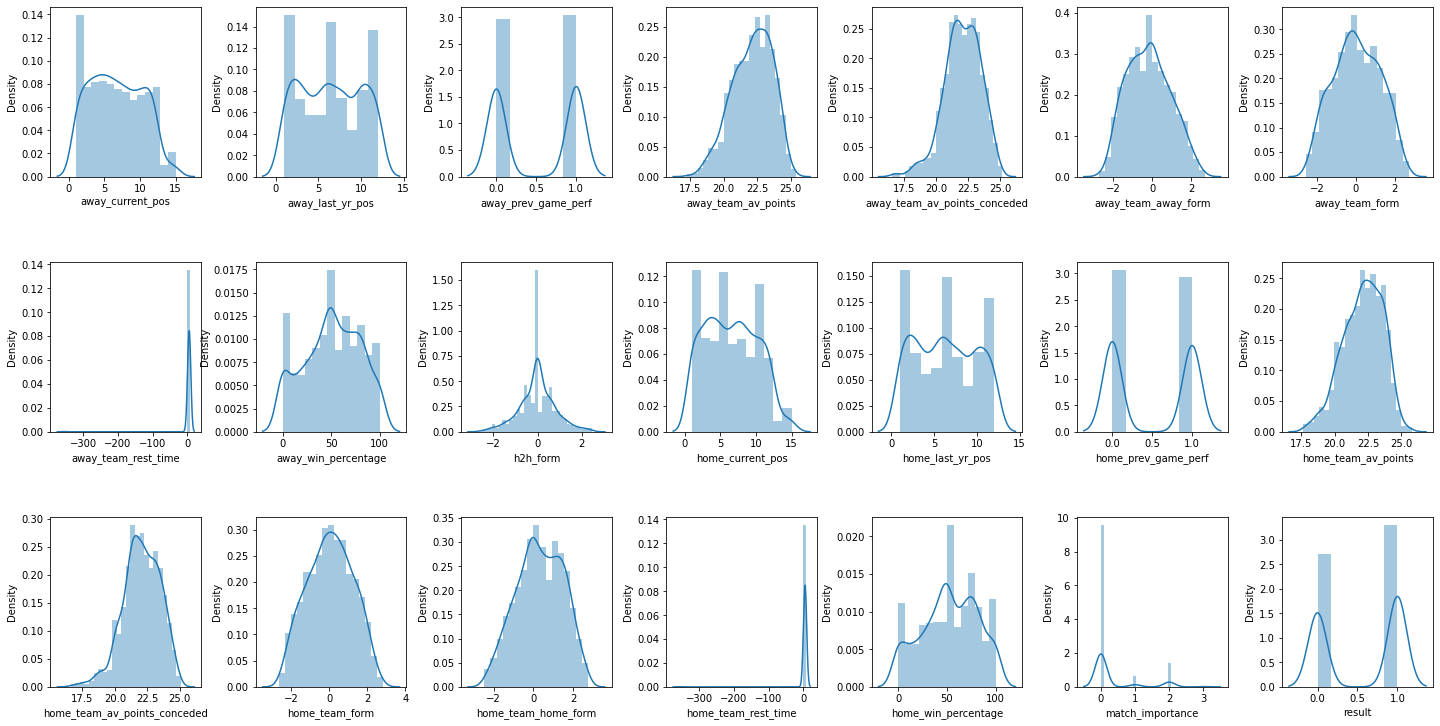

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

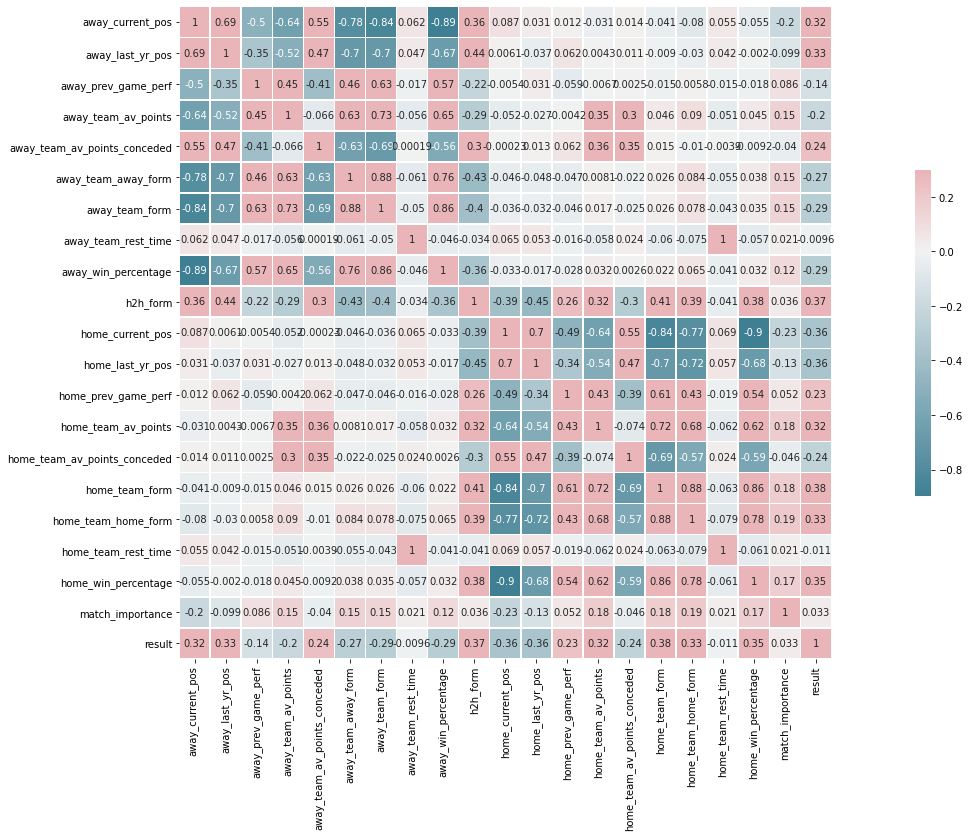

In [8]:
# Compute the correlation matrix
corr = df.corr()

# print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [9]:
df = df.drop(["away_team_rest_time"], axis=1)
# Due to high correlation with 'away_team_rest_time' as can be seen from correlation matrix

In [10]:
y = df["result"]
X = df.drop(["result"], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 121)

In [11]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)


scaled_X_train = pd.DataFrame(data=scaled_X_train, columns=X_train.columns)
scaled_X_test = pd.DataFrame(data=scaled_X_test, columns=X_test.columns)

# scaled_X_train

# maked a pipeline for scaling while corss_validation

In [12]:
# from sklearn.decomposition import PCA
# pca = PCA(0.95)
# X=pca.fit_transform(X)

In [13]:
cv = ShuffleSplit(n_splits=15, test_size=0.1, random_state=0)

In [14]:
#Logistic Regression
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# clf = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(solver='liblinear',max_iter=1000))
# clf2 = make_pipeline(preprocessing.MinMaxScaler(), LogisticRegression(solver='liblinear',max_iter=1000))

# scores = cross_validate(clf, X, y, scoring=scoring, cv=cv, return_train_score = True)
# scores2 = cross_validate(clf2, X, y, scoring=scoring, cv=cv, return_train_score = True)

LR = LogisticRegression()

LR.fit(scaled_X_train,y_train)
y_pred = LR.predict(scaled_X_test)
y_train_pred = LR.predict(scaled_X_train)
# accuracy_score(y_test,y_pred)

LR_test_accuracy = accuracy_score(y_test, y_pred)
LR_train_accuracy = accuracy_score(y_train,y_train_pred)
LR_test_f1 = f1_score(y_test,y_pred)
LR_train_f1 = f1_score(y_train,y_train_pred)
LR_test_roc = roc_auc_score(y_test,y_pred)
LR_train_roc = roc_auc_score(y_train,y_train_pred)
LR_test_accuracy

0.748062015503876

In [15]:
#DecisionTree

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# clf = make_pipeline(preprocessing.StandardScaler(), DecisionTreeClassifier())
# clf2 = make_pipeline(preprocessing.MinMaxScaler(), DecisionTreeClassifier())

# scores = cross_validate(clf, X, y, scoring=scoring, cv=cv, return_train_score = True)
# scores2 = cross_validate(clf2, X, y, scoring=scoring, cv=cv, return_train_score = True)


dtree = DecisionTreeClassifier()

dtree.fit(scaled_X_train,y_train)
y_pred = dtree.predict(scaled_X_test)
y_train_pred = dtree.predict(scaled_X_train)
# accuracy_score(y_test,y_pred)

dtree_test_accuracy = accuracy_score(y_test, y_pred)
dtree_train_accuracy = accuracy_score(y_train,y_train_pred)
dtree_test_f1 = f1_score(y_test,y_pred)
dtree_train_f1 = f1_score(y_train,y_train_pred)
dtree_test_roc = roc_auc_score(y_test,y_pred)
dtree_train_roc = roc_auc_score(y_train,y_train_pred)
dtree_test_accuracy

0.5891472868217055

In [16]:
#SVM

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# clf2 = make_pipeline(preprocessing.StandardScaler(), SVC(probability = True))
# clf = make_pipeline(preprocessing.MinMaxScaler(), SVC(probability = True))

# scores = cross_validate(clf, X, y, scoring=scoring, cv=cv, return_train_score = True)
# scores2 = cross_validate(clf2, X, y, scoring=scoring, cv=cv, return_train_score = True)

SVM = SVC(probability = True)

SVM.fit(scaled_X_train,y_train)
y_pred = SVM.predict(scaled_X_test)
y_train_pred = SVM.predict(scaled_X_train)
# accuracy_score(y_test,y_pred)

SVM_test_accuracy = accuracy_score(y_test, y_pred)
SVM_train_accuracy = accuracy_score(y_train,y_train_pred)
SVM_test_f1 = f1_score(y_test,y_pred)
SVM_train_f1 = f1_score(y_train,y_train_pred)
SVM_test_roc = roc_auc_score(y_test,y_pred)
SVM_train_roc = roc_auc_score(y_train,y_train_pred)
SVM_test_accuracy

0.7635658914728682

In [17]:
#Random Forest

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# clf2 = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier())
# clf = make_pipeline(preprocessing.MinMaxScaler(), RandomForestClassifier())

# scores = cross_validate(clf, X, y, scoring=scoring, cv=cv, return_train_score = True)
# scores2 = cross_validate(clf2, X, y, scoring=scoring, cv=cv, return_train_score = True)



RForest = RandomForestClassifier()

RForest.fit(scaled_X_train,y_train)
y_pred = RForest.predict(scaled_X_test)
y_train_pred = RForest.predict(scaled_X_train)
# accuracy_score(y_test,y_pred)

RForest_test_accuracy = accuracy_score(y_test, y_pred)
RForest_train_accuracy = accuracy_score(y_train,y_train_pred)
RForest_test_f1 = f1_score(y_test,y_pred)
RForest_train_f1 = f1_score(y_train,y_train_pred)
RForest_test_roc = roc_auc_score(y_test,y_pred)
RForest_train_roc = roc_auc_score(y_train,y_train_pred)
RForest_test_accuracy

0.7209302325581395

In [18]:
#KNN

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# clf = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier())
# clf2 = make_pipeline(preprocessing.MinMaxScaler(), KNeighborsClassifier())

# scores = cross_validate(clf, X, y, scoring=scoring, cv=cv, return_train_score = True)
# scores2 = cross_validate(clf2, X, y, scoring=scoring, cv=cv, return_train_score = True)

KNN = KNeighborsClassifier()

KNN.fit(scaled_X_train,y_train)
y_pred = KNN.predict(scaled_X_test)
y_train_pred = KNN.predict(scaled_X_train)
# accuracy_score(y_test,y_pred)

KNN_test_accuracy = accuracy_score(y_test, y_pred)
KNN_train_accuracy = accuracy_score(y_train,y_train_pred)
KNN_test_f1 = f1_score(y_test,y_pred)
KNN_train_f1 = f1_score(y_train,y_train_pred)
KNN_test_roc = roc_auc_score(y_test,y_pred)
KNN_train_roc = roc_auc_score(y_train,y_train_pred)
KNN_test_accuracy

0.7054263565891473

In [19]:
#Naive Bayes

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# clf = make_pipeline(preprocessing.StandardScaler(), GaussianNB())
# clf2 = make_pipeline(preprocessing.MinMaxScaler(), GaussianNB())

# scores = cross_validate(clf, X, y, scoring=scoring, cv=cv, return_train_score = True)
# scores2 = cross_validate(clf2, X, y, scoring=scoring, cv=cv, return_train_score = True)


bayes = GaussianNB()

bayes.fit(scaled_X_train,y_train)
y_pred = bayes.predict(scaled_X_test)
y_train_pred = bayes.predict(scaled_X_train)
# accuracy_score(y_test,y_pred)

bayes_test_accuracy = accuracy_score(y_test, y_pred)
bayes_train_accuracy = accuracy_score(y_train,y_train_pred)
bayes_test_f1 = f1_score(y_test,y_pred)
bayes_train_f1 = f1_score(y_train,y_train_pred)
bayes_test_roc = roc_auc_score(y_test,y_pred)
bayes_train_roc = roc_auc_score(y_train,y_train_pred)
bayes_test_accuracy

0.7131782945736435

In [21]:
#LDA

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# clf = make_pipeline(preprocessing.StandardScaler(), LinearDiscriminantAnalysis(solver='lsqr'))
# clf2 = make_pipeline(preprocessing.MinMaxScaler(), LinearDiscriminantAnalysis(solver='lsqr'))

# scores = cross_validate(clf, X, y, scoring=scoring, cv=cv, return_train_score = True)
# scores2 = cross_validate(clf2, X, y, scoring=scoring, cv=cv, return_train_score = True)

LDA = LinearDiscriminantAnalysis(solver='lsqr')

LDA.fit(scaled_X_train,y_train)
y_pred = LDA.predict(scaled_X_test)
y_train_pred = LDA.predict(scaled_X_train)
# accuracy_score(y_test,y_pred)

LDA_test_accuracy = accuracy_score(y_test, y_pred)
LDA_train_accuracy = accuracy_score(y_train,y_train_pred)
LDA_test_f1 = f1_score(y_test,y_pred)
LDA_train_f1 = f1_score(y_train,y_train_pred)
LDA_test_roc = roc_auc_score(y_test,y_pred)
LDA_train_roc = roc_auc_score(y_train,y_train_pred)
LDA_test_accuracy

0.751937984496124

In [22]:
#QDA

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# clf = make_pipeline(preprocessing.StandardScaler(), QuadraticDiscriminantAnalysis())
# clf2 = make_pipeline(preprocessing.MinMaxScaler(), QuadraticDiscriminantAnalysis())

# scores = cross_validate(clf, X, y, scoring=scoring, cv=cv, return_train_score = True)
# scores2 = cross_validate(clf2, X, y, scoring=scoring, cv=cv, return_train_score = True)


QDA = QuadraticDiscriminantAnalysis()

QDA.fit(scaled_X_train,y_train)
y_pred = QDA.predict(scaled_X_test)
y_train_pred = QDA.predict(scaled_X_train)
# accuracy_score(y_test,y_pred)

QDA_test_accuracy = accuracy_score(y_test, y_pred)
QDA_train_accuracy = accuracy_score(y_train,y_train_pred)
QDA_test_f1 = f1_score(y_test,y_pred)
QDA_train_f1 = f1_score(y_train,y_train_pred)
QDA_test_roc = roc_auc_score(y_test,y_pred)
QDA_train_roc = roc_auc_score(y_train,y_train_pred)
QDA_test_accuracy

0.689922480620155

In [23]:
#MLP
from sklearn.neural_network import MLPClassifier

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# clf = make_pipeline(preprocessing.StandardScaler(), MLPClassifier(solver='adam', alpha=3e-4, hidden_layer_sizes=(10), random_state=1,max_iter=1000))
# clf2 = make_pipeline(preprocessing.MinMaxScaler(), MLPClassifier(solver='adam', alpha=3e-4, hidden_layer_sizes=(10), random_state=1,max_iter=1000))

# scores = cross_validate(clf, X, y, scoring=scoring, cv=cv, return_train_score = True)
# scores2 = cross_validate(clf2, X, y, scoring=scoring, cv=cv, return_train_score = True)

MLP = MLPClassifier(solver='adam',learning_rate = 'adaptive',hidden_layer_sizes=(12), random_state=202,max_iter=2000,activation = 'relu')

MLP.fit(scaled_X_train,y_train)
y_pred = MLP.predict(scaled_X_test)
y_train_pred = MLP.predict(scaled_X_train)
# accuracy_score(y_test,y_pred)

MLP_test_accuracy = accuracy_score(y_test, y_pred)
MLP_train_accuracy = accuracy_score(y_train,y_train_pred)
MLP_test_f1 = f1_score(y_test,y_pred)
MLP_train_f1 = f1_score(y_train,y_train_pred)
MLP_test_roc = roc_auc_score(y_test,y_pred)
MLP_train_roc = roc_auc_score(y_train,y_train_pred)
MLP_test_accuracy

0.7713178294573644

In [24]:
models_initial = pd.DataFrame({
    'Model'         : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis','Neural Network'],
    'test_Acc'       : [LR_test_accuracy, dtree_test_accuracy, SVM_test_accuracy, RForest_test_accuracy, KNN_test_accuracy, bayes_test_accuracy, LDA_test_accuracy, QDA_test_accuracy,MLP_test_accuracy],
    'Accuracy'       : [LR_train_accuracy, dtree_train_accuracy, SVM_train_accuracy, RForest_train_accuracy, KNN_train_accuracy, bayes_train_accuracy, LDA_train_accuracy, QDA_train_accuracy,MLP_train_accuracy],
    'test_AUC_ROC'   : [LR_test_roc, dtree_test_roc, SVM_test_roc, RForest_test_roc, KNN_test_roc, bayes_test_roc, LDA_test_roc, QDA_test_roc,MLP_test_roc],
    'AUC_ROC'        : [LR_train_roc, dtree_train_roc, SVM_train_roc, RForest_train_roc, KNN_train_roc, bayes_train_roc, LDA_train_roc, QDA_train_roc,MLP_train_roc],
    'F1_Score'       : [LR_train_f1, dtree_train_f1, SVM_train_f1, RForest_train_f1, KNN_train_f1, bayes_train_f1, LDA_train_f1, QDA_train_f1,MLP_train_f1],
    'test_F1_Score'  : [LR_test_f1, dtree_test_f1, SVM_test_f1, RForest_test_f1, KNN_test_f1, bayes_test_f1, LDA_test_f1, QDA_test_f1,MLP_test_f1]
    
    }, columns = ['Model', 'test_Acc', 'Accuracy', 'test_AUC_ROC', 'AUC_ROC','test_F1_Score', 'F1_Score'])
print("StandardScaler preprocessing")
models_initial.sort_values(by='test_Acc', ascending=False)


StandardScaler preprocessing


,Model,test_Acc,Accuracy,test_AUC_ROC,AUC_ROC,test_F1_Score,F1_Score
8,Neural Network,0.771318,0.812984,0.770642,0.810286,0.787004,0.831441
2,Support Vector Machine,0.763566,0.786822,0.760835,0.781129,0.784452,0.812287
6,LinearDiscriminantAnalysis,0.751938,0.746124,0.751453,0.741204,0.768116,0.774138
0,Logistic Regression,0.748062,0.743217,0.747215,0.738367,0.765343,0.771355
3,Random Forest,0.720930,1.000000,0.720884,1.000000,0.737226,1.000000
5,Naive Bayes,0.713178,0.723837,0.724395,0.730247,0.691667,0.727273
4,K-Nearest Neighbors,0.705426,0.790698,0.701271,0.787058,0.734266,0.812500
7,QuadraticDiscriminantAnalysis,0.689922,0.701550,0.706961,0.721504,0.639640,0.660793
1,Decision Tree,0.589147,1.000000,0.588136,1.000000,0.613139,1.000000


In [25]:
# models_initial = pd.DataFrame({
#     'Model'         : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis','Neural Network'],
#     'test_Acc'       : [LR2_test_accuracy, dtree2_test_accuracy, SVM2_test_accuracy, RForest2_test_accuracy, KNN2_test_accuracy, bayes2_test_accuracy, LDA2_test_accuracy, QDA2_test_accuracy,MLP2_test_accuracy],
#     'Accuracy'       : [LR2_train_accuracy, dtree2_train_accuracy, SVM2_train_accuracy, RForest2_train_accuracy, KNN2_train_accuracy, bayes2_train_accuracy, LDA2_train_accuracy, QDA2_train_accuracy,MLP2_train_accuracy],
#     'test_Precision' : [LR2_test_precision, dtree2_test_precision, SVM2_test_precision, RForest2_test_precision, KNN2_test_precision, bayes2_test_precision, LDA2_test_precision, QDA2_test_precision,MLP2_test_precision],
#     'Precision'      : [LR2_train_precision, dtree2_train_precision, SVM2_train_precision, RForest2_train_precision, KNN2_train_precision, bayes2_train_precision, LDA2_train_precision, QDA2_train_precision,MLP2_train_precision],
#     'test_Recall'    : [LR2_test_recall, dtree2_test_recall, SVM2_test_recall, RForest2_test_recall, KNN2_test_recall, bayes2_test_recall, LDA2_test_recall, QDA2_test_recall,MLP2_test_recall],
#     'Recall'         : [LR2_train_recall, dtree2_train_recall, SVM2_train_recall, RForest2_train_recall, KNN2_train_recall, bayes2_train_recall, LDA2_train_recall, QDA2_train_recall,MLP2_train_recall],
#     'test_AUC_ROC'   : [LR2_test_roc, dtree2_test_roc, SVM2_test_roc, RForest2_test_roc, KNN2_test_roc, bayes2_test_roc, LDA2_test_roc, QDA2_test_roc,MLP2_test_roc],
#     'AUC_ROC'        : [LR2_train_roc, dtree2_train_roc, SVM2_train_roc, RForest2_train_roc, KNN2_train_roc, bayes2_train_roc, LDA2_train_roc, QDA2_train_roc,MLP2_train_roc],
    
#     }, columns = ['Model', 'test_Acc', 'Accuracy', 'test_Precision', 'Precision', 'test_Recall', 'Recall', 'test_AUC_ROC', 'AUC_ROC'])

# print("StandardScaler preprocessing")
# models_initial.sort_values(by='test_Acc', ascending=False)
